## Pseudocode RAR

Create a list with the number of data points per client  
Create a variable for initial weights  
Create a variable for the maximum number of rounds  
Create an empty list for weighted average loss for each round  
Create an empty list for weighted average accuracy for each round  
Create a variable 'n' with a value of 0  

For each round 'i' up to the maximum number of rounds:
- For each client:
    - If 'n' is equal to 0:
        - Train the first model
        - Save the model name for the next iteration
        - Set 'n' to 1
    - If 'n' is not equal to 0:
        - Save the weights of the previous iteration model
        - Assign the initial weights to the model for the new iteration
        - Train the new iteration model
        - Save the weights of the new iteration model
        - Save the weights in a list
        - Save the model name for the new iteration
        - Calculate the lengths of the previous and new iterations and store them in a list
        - Calculate weighted weights based on the lengths
        - Assign the weighted weights to the model
        - Save the model name for the next iteration
- Save the average loss for each round
- Save the average accuracy for each round

In [1]:
# !pip install pandas

In [2]:
# !pip install scikit-learn

In [3]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
np.random.seed(0)
import random as rn
rn.seed(0)
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras import regularizers
from tensorflow.keras.layers import BatchNormalization
tf.random.set_seed(0)

2023-09-12 18:34:34.848635: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-12 18:34:35.021216: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [4]:
os.getcwd()

'/srv'

In [5]:
# Loading processed and curated dataset:
dfHeart = pd.read_csv("/srv/heart_ConditionalMeanImputation.csv")
dfHeart

,Sex_F,Sex_M,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,40,140.0,289.0,0,172,0.0,0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,49,160.0,180.0,0,156,1.0,1
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,37,130.0,283.0,0,98,0.0,0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,48,138.0,214.0,0,108,1.5,1
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,54,150.0,195.0,0,122,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,45,110.0,264.0,0,132,1.2,1
914,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,68,144.0,193.0,1,141,3.4,1
915,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,57,130.0,131.0,0,115,1.2,1
916,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,57,130.0,236.0,0,174,0.0,1


In [6]:
# X_clients = 9 # number of clients
# data_dict = {}

# for i in range(X_clients):
#   portion = 1/(X_clients)*len(dfHeart)
#   X = dfHeart.loc[i*portion:(i+1)*portion,:].drop(['HeartDisease'], axis=1)
#   y = dfHeart.loc[i*portion:(i+1)*portion,:]['HeartDisease']
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#   client_data = {
#       'X_train': X_train,
#       'X_test': X_test,
#       'y_train': y_train,
#       'y_test': y_test
#   }
#   data_dict[f'client_{i+1}'] = client_data

In [7]:
dfHeart["Name"]="name"
# Estimated (from raw data) slices for each hospital
dfHeart.loc[0:293,"Name"] = "hung" # Hungarian Institute of Cardiology, Budapest
# Author: Andras Janosi, M.D.
dfHeart.loc[293:477,"Name"] = "swit" # University Hospital (Zurich and Basel) Switzerland
# Author: William Steinbrunn, M.D. and Matthias Pfisterer, M.D respectively.
dfHeart.loc[477:615,"Name"] = "long" # V.A. Medical Center, Long Beach
# Author: Robert Detrano, M.D., Ph.D.
dfHeart.loc[615:766,"Name"] = "stat" # Statlog dataset (confidential source)
# Author: "King RD. Department of Statistics and Modelling Science, University of Strathclyde, Glasgow"
dfHeart.loc[766:918,"Name"] = "clev" # Cleveland Clinic Foundation
# Author: Robert Detrano, M.D., Ph.D.

In [8]:
# Each group is divided into train and test groups and scaled
# Creation of data_dict dictionary
data_dict = {}
groups = dfHeart.groupby('Name')

for name, group in groups:
    X = group.drop(['HeartDisease', 'Name'], axis=1)
    y = group['HeartDisease']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    # Judith: escalamos los datos
    X_train = X_train.values
    X_test = X_test.values
    scaler = MinMaxScaler()
    scaler = scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    # Filling data_dict dictionary
    data_dict[name] = {
      'X_train': X_train,
      'X_test': X_test,
      'y_train': y_train,
      'y_test': y_test
  }

In [9]:
data_dict["long"]['X_train']

array([[0.        , 1.        , 0.        , ..., 0.        , 0.51351351,
        0.09756098],
       [0.        , 1.        , 0.        , ..., 0.        , 0.0990991 ,
        0.02439024],
       [0.        , 1.        , 0.        , ..., 0.        , 0.27927928,
        0.02439024],
       ...,
       [1.        , 0.        , 0.        , ..., 1.        , 0.45945946,
        0.02439024],
       [0.        , 1.        , 0.        , ..., 1.        , 0.3963964 ,
        0.26829268],
       [0.        , 1.        , 0.        , ..., 0.        , 0.72972973,
        0.02439024]])

In [10]:
data_dict.keys()

dict_keys(['clev', 'hung', 'long', 'stat', 'swit'])

In [11]:
from keras.layers import Dropout

# Create the model
model = keras.models.Sequential()

shape = data_dict[list(data_dict.keys())[0]]['X_train'].shape[1]

# Input layer
model.add(keras.layers.Dense(units=256, input_shape=(shape,), activation="relu", kernel_regularizer=regularizers.l1_l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Add a Dropout layer with a dropout rate of 50%

# Hidden layers
model.add(keras.layers.Dense(units=256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Add a Dropout layer with a dropout rate of 50%

model.add(keras.layers.Dense(units=256, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Add a Dropout layer with a dropout rate of 50%

model.add(keras.layers.Dense(units=128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Add a Dropout layer with a dropout rate of 50%

model.add(keras.layers.Dense(units=32, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # Add a Dropout layer with a dropout rate of 50%

# Output layer
model.add(keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss="binary_crossentropy", 
              metrics=["accuracy", "AUC"])

2023-09-12 18:34:37.186949: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-12 18:34:37.193351: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-12 18:34:37.196149: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-12 18:34:37.199197: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operati

In [12]:
def ave_weights(n_i,listOfWeights):
    """
    Aggregation function

   :param list n_i: Number of samples for each client
   :param list listOfWeights: Weights for each client
   :return: Final weighted average for global model
    """
    N = sum(n_i) # total number of samples of all clients
    # initial weights of global model, set to zero
    ave_weights = listOfWeights[0]
    ave_weights = [i * 0 for i in ave_weights]
    # loop whose range is number of clients
    for j in range(len(n_i)):
        # receive weights from clients
        rec_weight = listOfWeights[j]
        # multiply the client weights by number of local data samples in client local data
        rec_weight =  [i * n_i[j] for i in rec_weight]
        # divide the weights by total number of samples of all clients
        rec_weight =  [i / N for i in rec_weight]
        # sum the weights of new client with the prior
        ave_weights = [x + y for x, y in zip(ave_weights,rec_weight)]
    return ave_weights

In [ ]:
# def weighted_mean(n_i, metric_list):
#     """
#     Calculate the weighted mean of an evaluation metric.

#     :param list n_i: Number of samples for each client
#     :param list metric_list: List of evaluation metric values for each client
#     :return: Weighted mean of the evaluation metric
#     """
#     total_samples = sum(n_i)  # Total number of samples of all clients
#     weighted_metric_sum = 0.0

#     for j in range(len(n_i)):
#         weighted_metric_sum += metric_list[j] * n_i[j]

#     weighted_mean = weighted_metric_sum / total_samples
#     return weighted_mean

-  Select a maximum number of rounds, leaving a validation set for each dataset.
-  Analyze the error/accuracy of the resulting model for each round in the validation of each dataset.
-  Calculate the weighted average of the error/accuracy for each round. In other words, for round i, we will have different error and accuracy values for each dataset. You can aggregate them (weighted based on the number of data points) and obtain the weighted average of the error and/or accuracy.

In [14]:
for i in range(5):
    print(i)

0
1
2
3
4


In [16]:
# Set random seed
rn.seed(42)

# Maximum number of rounds n_times
n_times = 10

n=0

# Initial parameters previous random client list generation
my_list = list(data_dict.keys())

acc_val_round = [[] for _ in range(len(my_list))]
loss_val_round = [[] for _ in range(len(my_list))]

# Initial weights previous rounds, it will be updated for each client on each round
saveModels = [[] for _ in range(len(my_list))]
for saveModel in saveModels:
    saveModel.append(model.get_weights())    

# Rounds of the randomized gossip learning
for i in range(1,n_times+1):
    
    # Each round of the fixed gossip learning      
    for idx, name in enumerate(my_list):
        # At the beginning of the first round. The list "acc_val_round" is empty 
        if n == 0:
            # ------------------------------------------
            # Setting initial weights (of the model updating in the previous round)
            model.set_weights(saveModels[idx][-1])
            # TRAINING FIRST CLIENT FOR THE FIRST TIME:
            X_train_np = np.array(data_dict[name]['X_train'])
            y_train_np = np.array(data_dict[name]['y_train'])
            history = model.fit(X_train_np,y_train_np, epochs=14, 
                                batch_size=38, validation_split=0.15, verbose=0)
            # Save the accuracy and loss at the final of the round
            acc_val_round[idx].append(history.history['val_accuracy'][-1])
            loss_val_round[idx].append(history.history['val_loss'][-1])
            
            saveModels[idx].append(model.get_weights())
            # Saving the name and position for the next iteration
            name_prev = name
            position_prev = idx
            print("entré")
            n=1
            # ------------------------------------------
        else:
            # ------------------------------------------
            # TRAINING CLIENT N:
            # Setting initial weights (of the model updating in the previous round)
            model.set_weights(saveModels[idx][-1])
            # Train client:
            X_train_np = np.array(data_dict[name]['X_train'])
            y_train_np = np.array(data_dict[name]['y_train'])
            history = model.fit(X_train_np,y_train_np, epochs=14, 
                                batch_size=38, validation_split=0.15, verbose=0)
            # ------------------------------------------
            # AVERAGING WITH WEIGHT OF N-1 CLIENT:
            # Calculating the lengths of the names of the previous and current iteration
            samples_len = [len(data_dict[name_prev]['X_train']),len(data_dict[name]['X_train'])]
            # Aggregate the weights obtained with each client using an aggregation function that performs a weighted average:
            avg_weights = ave_weights(samples_len,[saveModels[position_prev][-1], model.get_weights()]) # use of aggregation function
            # ------------------------------------------
            model.set_weights(avg_weights)
            history = model.fit(X_train_np,y_train_np, epochs=14, 
                                batch_size=38, validation_split=0.15, verbose=0)
            # ------------------------------------------
            # Save the accuracy and loss at the final of the round
            acc_val_round[idx].append(history.history['val_accuracy'][-1])
            loss_val_round[idx].append(history.history['val_loss'][-1])
            # UPDATING MODEL:
            saveModels[idx].append(avg_weights)
            # ------------------------------------------
            # Saving the name and position for the next iteration
            name_prev = name
            position_prev = idx
        # # ----------------------------------------------
        # # AT THE FINAL OF THE ROUND, OBTAIN VALIDATION METRICS
        # if name == my_list[-1]:
        #     model.set_weights(saveModels[idx])
        #     X_train_np = np.array(data_dict[name]['X_train'])
        #     y_train_np = np.array(data_dict[name]['y_train'])
        #     history = model.fit(X_train_np,y_train_np, epochs=14, 
        #                         batch_size=38, validation_split=0.15, verbose=0)
        #     # Save the accuracy and loss at the final of the round
        #     acc_val_round.append(history.history['val_accuracy'][-1])
        #     loss_val_round.append(history.history['val_loss'][-1])
        # # ----------------------------------------------

2023-09-12 18:34:55.065567: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x30eb4b60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-12 18:34:55.065660: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2023-09-12 18:34:55.077863: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-12 18:34:55.264088: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


entré


Once you have that weighted average for validation, select the optimal number of rounds that need to be repeated for the FL architecture.

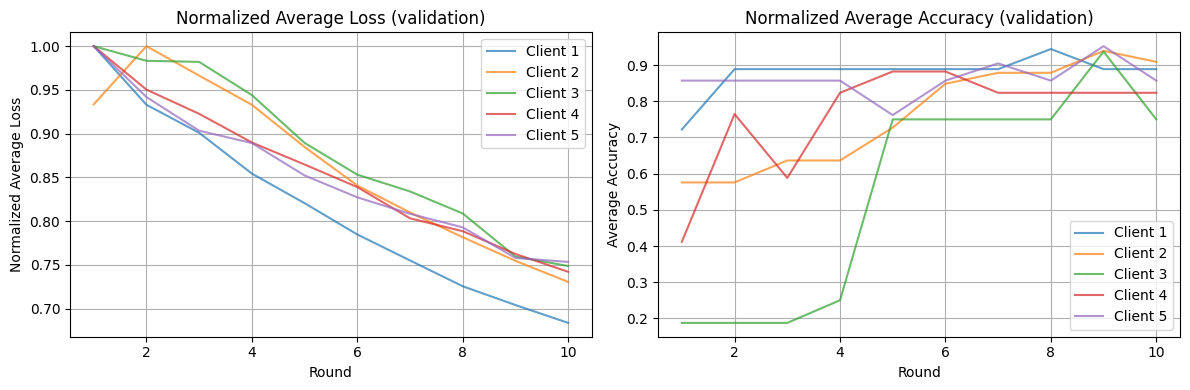

In [19]:
import matplotlib.pyplot as plt
loss_val_round_np = np.array(loss_val_round)
# Crea una figura con dos subtramas (una fila y dos columnas)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Itera sobre las listas de pérdida y precisión de cada cliente
for i in range(len(my_list)):
    client_loss = loss_val_round_np[i]
    client_accuracy = acc_val_round[i]
    
    # Subtrama 1: Curva de Loss
    ax1.plot(range(1, n_times + 1), client_loss / max(client_loss), label=f'Client {i+1}', alpha=0.7)

    # Subtrama 2: Curva de Accuracy
    ax2.plot(range(1, n_times + 1), client_accuracy, label=f'Client {i+1}', alpha=0.7)

# Añade etiquetas y títulos a las subtramas
ax1.set_xlabel('Round')
ax1.set_ylabel('Normalized Average Loss')
ax1.set_title('Normalized Average Loss (validation)')
ax1.grid()
ax1.legend()

ax2.set_xlabel('Round')
ax2.set_ylabel('Average Accuracy')
ax2.set_title('Normalized Average Accuracy (validation)')
ax2.grid()
ax2.legend()

# Ajusta el espaciado entre las subtramas
plt.tight_layout()

# Muestra el gráfico
plt.show()

In [ ]:
loss_val_round_np/max(loss_val_round)

In [ ]:
acc_val_round

In [ ]:
# The best equilibrium between acc_val_round and loss_val_round is found at the round 32
max_acc_round = np.argmax(acc_val_round) + 1
max_acc_round

In [ ]:
optim_acc = acc_val_round[max_acc_round-1]
optim_loss = loss_val_round[max_acc_round-1]
print(" optim_acc:",optim_acc)
print(" optim_loss:",optim_loss)

Repeat the process without using validation (i.e., now we do not leave data aside for validation since validation has already been done previously).

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(units=256, input_shape=(shape,), activation="relu", kernel_regularizer=regularizers.l1_l2(0.01)))
model.add(BatchNormalization())
model.add(keras.layers.Dense(units=256, activation="relu"))
model.add(BatchNormalization())
model.add(keras.layers.Dense(units=256, activation="relu"))
model.add(BatchNormalization())
model.add(keras.layers.Dense(units=128, activation="relu"))
model.add(BatchNormalization())
model.add(keras.layers.Dense(units=32, activation="relu"))
model.add(BatchNormalization())
model.add(keras.layers.Dense(units=1, activation="sigmoid"))
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                loss="binary_crossentropy", 
                metrics=["accuracy", "AUC"])

In [ ]:
# Get initial weights from created model before loop
initial_weights = model.get_weights()

# Repeat n_times train clients data, average their weights to set on global model and save it
n_times = 32
for i in range(1,n_times+1):
    
    # Get the initial weights:
    save_weights = list()
    
    # Generate weights for each client
    for name in data_dict.keys():
        # Train client:
        callbacks = [keras.callbacks.EarlyStopping(patience=25)]
        #model.fit(data_dict[name]['X_train'],data_dict[name]['y_train'], epochs=12, batch_size=40,verbose=0) 
        # Judith: en el modelo en el que usabas la validación para obtener el número de rondas óptimo ponías epochs=14, batch_size=38
        model.fit(data_dict[name]['X_train'],data_dict[name]['y_train'], epochs=14, batch_size=38,verbose=0) 
        # Obtain client weights:
        weights_client = model.get_weights()
        # Save weights:
        save_weights.append(weights_client)
        model.set_weights(initial_weights)

    # Aggregate the weights obtained with each client using an aggregation function that performs a weighted average:
    avg_weights = ave_weights(n_i,save_weights) # use of aggregation function
    model.set_weights(avg_weights)
    initial_weights = avg_weights
    
model.save('model_initialTest_

           RAR.h5')    

In [ ]:
# Aquí estás volviendo a entrenar, tendrías que evaluar directamente los resultados en test con el último modelo tras agregar (y mirar el train de cada cliente)
# history = model.fit(X_train,y_train, epochs=14, batch_size=38, verbose=0)
for name in data_dict.keys():
    print(f'Client: {name}')
    score_train = model.evaluate(data_dict[name]['X_train'],data_dict[name]['y_train'], verbose = 0)
    print(f'Train loss: {score_train[0]}')
    print(f'Train accuracy: {score_train[1]}')
    print(f'Train AUC: {score_train[2]}\n')

In [ ]:
for name in data_dict.keys():
    print(f'Client: {name}')
    score_train = model.evaluate(data_dict[name]['X_test'],data_dict[name]['y_test'], verbose = 0)
    print(f'Train loss: {score_train[0]}')
    print(f'Train accuracy: {score_train[1]}')
    print(f'Train AUC: {score_train[2]}\n')

Maybe it overfits because I trained a model with the same data points when cross-validated.